<a href="https://colab.research.google.com/github/CodeVerse-team/python-for-data-analysis-learning-libraries/blob/main/Data%20Frames%20in%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Frames in Pandas

---

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate here):


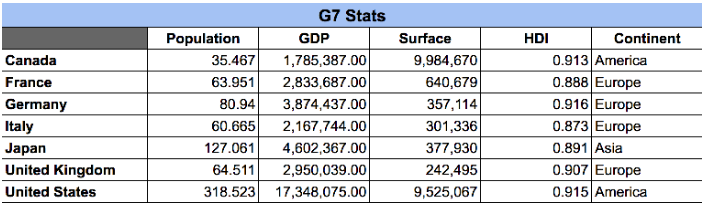

[Link for the Data reference](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?gid=0#gid=0)

Creating `Data Frame` manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csb file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [81]:
import numpy as np
import pandas as pd

In [82]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

(The `Columns` attribute is optional I'm using it to keep the same order as in the picture above also it gives a clarity like sort of heading.)

In [83]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


`DataFrame` also have indexes. As you can see in the 'Table' above, pandas has assigned a numeric, autoincremental index automatically to each "Row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [84]:
df.index = {
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States'
}

In [85]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [86]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [87]:
df.index

Index(['Germany', 'Canada', 'Japan', 'United States', 'United Kingdom',
       'Italy', 'France'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Germany to France
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 636.0+ bytes


In [89]:
df.size

35

In [90]:
df.shape

(7, 5)

In [91]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [92]:
df.dtypes

,0
Population,float64
GDP,int64
Surface Area,int64
HDI,float64
Continent,object


In [93]:
df.dtypes.value_counts()

,count
float64,2
int64,2
object,1




---

# Indexing, Selection and Slicing

Individual columns in the Data Frame can be selected with regular indexing. Each Column is represented as a `Series`:

In [94]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [95]:
df.loc['Canada']

,Canada
Population,63.951
GDP,2833687
Surface Area,640679
HDI,0.888
Continent,Europe


In [96]:
df.iloc[-1]

,France
Population,318.523
GDP,17348075
Surface Area,9525067
HDI,0.915
Continent,America


In [97]:
df['Population']

,Population
Germany,35.467
Canada,63.951
Japan,80.940
United States,60.665
United Kingdom,127.061
Italy,64.511
France,318.523


Note that the `Index`of the returned Series in the same as the DataFrame one. And its `name` is the name of the column. if you're working on a notebook and want to see a more DataFrame - like format you can use the `to_frame` method

In [98]:
df['Population'].to_frame()

,Population
Germany,35.467
Canada,63.951
Japan,80.940
United States,60.665
United Kingdom,127.061
Italy,64.511
France,318.523


Multile columns can also be selected similarly to `Numpy` and `Series`

In [99]:
df[['Population', 'GDP']]

,Population,GDP
Germany,35.467,1785387
Canada,63.951,2833687
Japan,80.940,3874437
United States,60.665,2167744
United Kingdom,127.061,4602367
Italy,64.511,2950039
France,318.523,17348075


in this case, the reseult is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [100]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe


In [101]:
 df.iloc[1:3, 3] # here we are asking for the row 1 to 3, and the column is to be from 3rd one.

,HDI
Canada,0.888
Japan,0.916


In [102]:
df.iloc[1:3, [0,3]]

,Population,HDI
Canada,63.951,0.888
Japan,80.940,0.916


In [103]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
Canada,2833687,640679
Japan,3874437,357114



> RECOMMENDED: Always use `loc` and `iloc` to reduce ambiguity, specially with `DataFrame` with numeric indexes



# Conditional Selection (boolean arrays)
we saw conditional selection applied to `Series` and it'll work in the same way for `DataFrame`. Afterall, a `Data Frame` is a collection of `Series`

In [104]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [105]:
df['Population'] > 70

,Population
Germany,False
Canada,False
Japan,True
United States,False
United Kingdom,True
Italy,False
France,True


In [106]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Japan,80.940,3874437,357114,0.916,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
France,318.523,17348075,9525067,0.915,America


In [107]:
df.loc[df['Population'] > 70, 'Population']

,Population
Japan,80.940
United Kingdom,127.061
France,318.523


In [108]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Japan,80.940,3874437
United Kingdom,127.061,4602367
France,318.523,17348075


# Dropping stuff
Opposed to the Concept of selection, we have 'Dropping'. Instead of pointing out which values you'd like to select you could point which ones you'dlike to `drop`:

In [109]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [110]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [111]:
df.drop(columns = ['Population', 'HDI'])

,GDP,Surface Area,Continent
Germany,1785387,9984670,America
Canada,2833687,640679,Europe
Japan,3874437,357114,Europe
United States,2167744,301336,Europe
United Kingdom,4602367,377930,Asia
Italy,2950039,242495,Europe
France,17348075,9525067,America


In [112]:
df.drop(['Italy', 'Canada'], axis = 0)

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
France,318.523,17348075,9525067,0.915,America


In [113]:
df.drop(['Population', 'HDI'], axis = 1)

,GDP,Surface Area,Continent
Germany,1785387,9984670,America
Canada,2833687,640679,Europe
Japan,3874437,357114,Europe
United States,2167744,301336,Europe
United Kingdom,4602367,377930,Asia
Italy,2950039,242495,Europe
France,17348075,9525067,America


In [114]:
df.drop(['Population', 'HDI'], axis = 'columns')

,GDP,Surface Area,Continent
Germany,1785387,9984670,America
Canada,2833687,640679,Europe
Japan,3874437,357114,Europe
United States,2167744,301336,Europe
United Kingdom,4602367,377930,Asia
Italy,2950039,242495,Europe
France,17348075,9525067,America


In [115]:
df.drop(['Canada', 'Germany'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


All these `Drop` methods return a new `DataFrame`. if you'd like to modify it "in place", you can use the `inplace` attribute (there's an example below).

# Operations

In [116]:
df[['Population', 'GDP']]

,Population,GDP
Germany,35.467,1785387
Canada,63.951,2833687
Japan,80.940,3874437
United States,60.665,2167744
United Kingdom,127.061,4602367
Italy,64.511,2950039
France,318.523,17348075


In [117]:
df[['Population', 'GDP']] / 100

,Population,GDP
Germany,0.35467,17853.87
Canada,0.63951,28336.87
Japan,0.80940,38744.37
United States,0.60665,21677.44
United Kingdom,1.27061,46023.67
Italy,0.64511,29500.39
France,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [118]:
eg = pd.Series([-1_000_000, -0.3], index = ['GDP', 'HDI'])
eg

,0
GDP,-1000000.0
HDI,-0.3


In [119]:
df[['GDP', 'HDI']]  + eg # by doing this we get to know that we can do operations between a Series and DataFrame

,GDP,HDI
Germany,785387.0,0.613
Canada,1833687.0,0.588
Japan,2874437.0,0.616
United States,1167744.0,0.573
United Kingdom,3602367.0,0.591
Italy,1950039.0,0.607
France,16348075.0,0.615


## Modifying DataFrames

It's simple and intuitive, You can add columns, or replace values for columns without issues

## Adding a new column

In [120]:
langs = pd.Series(
    ['French', 'German', 'Italian', 'European'],
    index = ['France', 'Germany', 'Italy', 'United Kingdom'],
    name = 'Language'
)

In [121]:
df['Language'] = langs

In [122]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Germany,35.467,1785387,9984670,0.913,America,German
Canada,63.951,2833687,640679,0.888,Europe,NaN
Japan,80.940,3874437,357114,0.916,Europe,NaN
United States,60.665,2167744,301336,0.873,Europe,NaN
United Kingdom,127.061,4602367,377930,0.891,Asia,European
Italy,64.511,2950039,242495,0.907,Europe,Italian
France,318.523,17348075,9525067,0.915,America,French


## Replacing Values per Column

In [123]:
df['Language'] = 'English'

In [124]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Germany,35.467,1785387,9984670,0.913,America,English
Canada,63.951,2833687,640679,0.888,Europe,English
Japan,80.940,3874437,357114,0.916,Europe,English
United States,60.665,2167744,301336,0.873,Europe,English
United Kingdom,127.061,4602367,377930,0.891,Asia,English
Italy,64.511,2950039,242495,0.907,Europe,English
France,318.523,17348075,9525067,0.915,America,English


## Renaming Columns

In [125]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC',
        'GDP': 'Gross Development Product'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK',
        'Argentina': 'AR'
    })

,Population,Gross Development Product,Surface Area,Human Development Index,Continent,Language
Germany,35.467,1785387,9984670,0.913,America,English
Canada,63.951,2833687,640679,0.888,Europe,English
Japan,80.940,3874437,357114,0.916,Europe,English
USA,60.665,2167744,301336,0.873,Europe,English
UK,127.061,4602367,377930,0.891,Asia,English
Italy,64.511,2950039,242495,0.907,Europe,English
France,318.523,17348075,9525067,0.915,America,English


In [126]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Germany,35.467,1785387,9984670,0.913,America,English
Canada,63.951,2833687,640679,0.888,Europe,English
Japan,80.940,3874437,357114,0.916,Europe,English
United States,60.665,2167744,301336,0.873,Europe,English
United Kingdom,127.061,4602367,377930,0.891,Asia,English
Italy,64.511,2950039,242495,0.907,Europe,English
France,318.523,17348075,9525067,0.915,America,English


In [127]:
df.rename(index=str.upper)

,Population,GDP,Surface Area,HDI,Continent,Language
GERMANY,35.467,1785387,9984670,0.913,America,English
CANADA,63.951,2833687,640679,0.888,Europe,English
JAPAN,80.940,3874437,357114,0.916,Europe,English
UNITED STATES,60.665,2167744,301336,0.873,Europe,English
UNITED KINGDOM,127.061,4602367,377930,0.891,Asia,English
ITALY,64.511,2950039,242495,0.907,Europe,English
FRANCE,318.523,17348075,9525067,0.915,America,English


In [128]:
df.rename(index=lambda x: x.lower())

,Population,GDP,Surface Area,HDI,Continent,Language
germany,35.467,1785387,9984670,0.913,America,English
canada,63.951,2833687,640679,0.888,Europe,English
japan,80.940,3874437,357114,0.916,Europe,English
united states,60.665,2167744,301336,0.873,Europe,English
united kingdom,127.061,4602367,377930,0.891,Asia,English
italy,64.511,2950039,242495,0.907,Europe,English
france,318.523,17348075,9525067,0.915,America,English


## Droppping Columns

In [130]:
df.drop(columns= 'Language', inplace= True)
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


## Adding Values

In [135]:
df = pd.concat([df, pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China').to_frame().T])
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670.0,0.913,America
Canada,63.951,2833687,640679.0,0.888,Europe
Japan,80.940,3874437,357114.0,0.916,Europe
United States,60.665,2167744,301336.0,0.873,Europe
United Kingdom,127.061,4602367,377930.0,0.891,Asia
Italy,64.511,2950039,242495.0,0.907,Europe
France,318.523,17348075,9525067.0,0.915,America
China,3.000,5,NaN,NaN,NaN
China,3.000,5,NaN,NaN,NaN
China,3.000,5,NaN,NaN,NaN


**Before concat I was trying to add append, but it says append does not accepted in pandas so i rolled in with this** Concat returns a new `DataFrame`:

---

you can directly set the new index and values to the `DataFrame`:

In [136]:
df.loc['china'] = pd.Series({
    'Population': 1_400_000_000,
    'Continent': 'Asia'
})

In [138]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,3.546700e+01,1785387.0,9984670.0,0.913,America
Canada,6.395100e+01,2833687.0,640679.0,0.888,Europe
Japan,8.094000e+01,3874437.0,357114.0,0.916,Europe
United States,6.066500e+01,2167744.0,301336.0,0.873,Europe
United Kingdom,1.270610e+02,4602367.0,377930.0,0.891,Asia
Italy,6.451100e+01,2950039.0,242495.0,0.907,Europe
France,3.185230e+02,17348075.0,9525067.0,0.915,America
China,3.000000e+00,5.0,NaN,NaN,NaN
China,3.000000e+00,5.0,NaN,NaN,NaN
China,3.000000e+00,5.0,NaN,NaN,NaN


we can use `drop` to just remove a row by index:

In [139]:
df.drop('China', inplace=True)

In [140]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,3.546700e+01,1785387.0,9984670.0,0.913,America
Canada,6.395100e+01,2833687.0,640679.0,0.888,Europe
Japan,8.094000e+01,3874437.0,357114.0,0.916,Europe
United States,6.066500e+01,2167744.0,301336.0,0.873,Europe
United Kingdom,1.270610e+02,4602367.0,377930.0,0.891,Asia
Italy,6.451100e+01,2950039.0,242495.0,0.907,Europe
France,3.185230e+02,17348075.0,9525067.0,0.915,America
china,1.400000e+09,NaN,NaN,NaN,Asia


****
## More Radical index changes

In [141]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Germany,3.546700e+01,1785387.0,9984670.0,0.913,America
1,Canada,6.395100e+01,2833687.0,640679.0,0.888,Europe
2,Japan,8.094000e+01,3874437.0,357114.0,0.916,Europe
3,United States,6.066500e+01,2167744.0,301336.0,0.873,Europe
4,United Kingdom,1.270610e+02,4602367.0,377930.0,0.891,Asia
5,Italy,6.451100e+01,2950039.0,242495.0,0.907,Europe
6,France,3.185230e+02,17348075.0,9525067.0,0.915,America
7,china,1.400000e+09,NaN,NaN,NaN,Asia


In [142]:
df.set_index('Population')

,GDP,Surface Area,HDI,Continent
Population,,,,
3.546700e+01,1785387.0,9984670.0,0.913,America
6.395100e+01,2833687.0,640679.0,0.888,Europe
8.094000e+01,3874437.0,357114.0,0.916,Europe
6.066500e+01,2167744.0,301336.0,0.873,Europe
1.270610e+02,4602367.0,377930.0,0.891,Asia
6.451100e+01,2950039.0,242495.0,0.907,Europe
3.185230e+02,17348075.0,9525067.0,0.915,America
1.400000e+09,NaN,NaN,NaN,Asia


## Creating columns from other columns

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, `GDP / Population`.

In [144]:
df[['Population', 'GDP']]

,Population,GDP
Germany,3.546700e+01,1785387.0
Canada,6.395100e+01,2833687.0
Japan,8.094000e+01,3874437.0
United States,6.066500e+01,2167744.0
United Kingdom,1.270610e+02,4602367.0
Italy,6.451100e+01,2950039.0
France,3.185230e+02,17348075.0
china,1.400000e+09,NaN


The regular pandas way of expressing that, is just dividing each series:

In [145]:
df['GDP'] / df['Population']

,0
Germany,50339.385908
Canada,44310.284437
Japan,47868.013343
United States,35733.025633
United Kingdom,36221.712406
Italy,45729.239975
France,54464.120330
china,NaN


The result of that operation is just another Series that you can add to the original `DataFrame`:

In [146]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [147]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Germany,3.546700e+01,1785387.0,9984670.0,0.913,America,50339.385908
Canada,6.395100e+01,2833687.0,640679.0,0.888,Europe,44310.284437
Japan,8.094000e+01,3874437.0,357114.0,0.916,Europe,47868.013343
United States,6.066500e+01,2167744.0,301336.0,0.873,Europe,35733.025633
United Kingdom,1.270610e+02,4602367.0,377930.0,0.891,Asia,36221.712406
Italy,6.451100e+01,2950039.0,242495.0,0.907,Europe,45729.239975
France,3.185230e+02,17348075.0,9525067.0,0.915,America,54464.120330
china,1.400000e+09,NaN,NaN,NaN,Asia,NaN


## Statistical Info
you've aldready seen the `describe` method, which gives you a good "summary" of the `DataFrame`. Let's explore other methods in more detail

In [150]:
df.head() # this method in pandas is to just to take a look in the data set so it just brings up first 5 rows in the data.

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Germany,35.467,1785387.0,9984670.0,0.913,America,50339.385908
Canada,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Japan,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
United States,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
United Kingdom,127.061,4602367.0,377930.0,0.891,Asia,36221.712406


In [151]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,8.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,1.750001e+08,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,4.949747e+08,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,3.546700e+01,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,6.312950e+01,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,7.272550e+01,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,1.749265e+02,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,1.400000e+09,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [152]:
population = df['Population']

In [153]:
population.min(), population.max()

(35.467, 1400000000.0)

In [154]:
population.sum()

np.float64(1400000751.118)

In [155]:
population.sum() / len(population)

np.float64(175000093.88975)

In [156]:
population.mean()

np.float64(175000093.88975)

In [157]:
population.std()

494974708.8934035

In [158]:
population.median()

72.7255

In [161]:
population.describe()

,Population
count,8.000000e+00
mean,1.750001e+08
std,4.949747e+08
min,3.546700e+01
25%,6.312950e+01
50%,7.272550e+01
75%,1.749265e+02
max,1.400000e+09


In [162]:
population.quantile(.25)

np.float64(63.1295)

In [163]:
population.quantile([.2, .4, .6, .8, 1])

,Population
0.2,6.197940e+01
0.4,6.439900e+01
0.6,9.016420e+01
0.8,2.419382e+02
1.0,1.400000e+09
